# 3 Classification

## 3.1 Churn prediction project

Dataset: [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download()

## 3.2 Data preparation

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') # read csv files

In [3]:
len(df)

7043

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_') # replace the space separator in the columns names of a dataframe

In [8]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [9]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [10]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [11]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [12]:
df.totalcharges = df.totalcharges.fillna(0)

In [13]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [14]:
df.churn =  (df.churn == 'yes').astype(int)

In [15]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


## 3.3 Setting up the validation framework

- Perform the train/validation/test split with Scikit-Learn

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [18]:
len(df_full_train), len(df_test)

(5634, 1409)

In [19]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [20]:
len(df_train), len(df_test), len(df_val)

(4225, 1409, 1409)

In [21]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
6108,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
1530,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
3701,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_train.reset_index(drop=True)
df_test = df_train.reset_index(drop=True)

In [23]:
y_train = df_train.churn
y_val = df_val .churn.values
y_test = df_test.churn.values
y_train

0       0
1       0
2       1
3       0
4       0
       ..
4220    0
4221    0
4222    1
4223    0
4224    1
Name: churn, Length: 4225, dtype: int64

In [24]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 Exploratory data analysis
- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [25]:
df_full_train = df_full_train.reset_index(drop=True) # shuffle

In [26]:
df_full_train.isnull().sum() # check for missing values

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [27]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [28]:
global_churn_rate  = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [29]:
df_full_train.dtypes # Check for numerical variable

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [30]:
numerical  = ['tenure', 'monthlycharges','totalcharges']
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [31]:
df_full_train.columns # All columns 

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [32]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

categorical

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [33]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio
- Churn rate
- Risk ratio
- Mutual information - later

**Churn rate**

In [34]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [35]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
np.round(churn_female, decimals=2).item()

0.28

In [36]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
np.round(churn_male, decimals=2).item()

0.26

In [37]:
global_churn = df_full_train.churn.mean()
np.round(global_churn, decimals=2).item()

0.27

In [38]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [39]:
churn_with_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
np.round(churn_with_partner, decimals=2).item()

0.21

In [40]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
np.round(churn_no_partner, decimals=2).item()

0.33

In [41]:
churn_rate_with_partner = global_churn - churn_with_partner
np.round(churn_rate_with_partner, decimals=2).item()

0.06

In [42]:
churn_rate_no_partner = global_churn - churn_no_partner
np.round(churn_rate_no_partner, decimals=2).item()

-0.06

In [43]:
churn_rate_female = global_churn - churn_female
np.round(churn_rate_female, decimals=2).item()

-0.01

In [44]:
churn_rate_male = global_churn - churn_male
np.round(churn_rate_male, decimals=2).item()

0.01

**Risk ratio**

In [45]:
churn_no_partner / global_churn

np.float64(1.2216593879412643)

In [46]:
churn_with_partner / global_churn

np.float64(0.7594724924338315)

In [47]:
from IPython.display import display

In [48]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 3.6 Feature importance: Correlation
Mutual information -a  concept from information theory, it tells us how much we can learn about one
variable if we know the value of another
- [Mutual information](https://en.wikipedia.org/wiki/Mutual_information)

In [49]:
from sklearn.metrics import mutual_info_score

In [50]:
mutual_info_score(df_full_train.churn, df_full_train.contract, contingency=None)

0.0983203874041556

In [51]:
mutual_info_score(df_full_train.churn, df_full_train.gender, contingency=None)

0.0001174846211139946

In [52]:
mutual_info_score(df_full_train.churn, df_full_train.partner, contingency=None)

0.009967689095399745

In [53]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [54]:
mutual_info = df_full_train[categorical].apply(mutual_info_churn_score)
mutual_info.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature importance: Correlation
How about numerical columns?
- [Correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

In [55]:
df_full_train.tenure.max().item()

72

In [56]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [57]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [58]:
df_full_train[df_full_train.tenure <= 2].churn.mean().item()

0.5953420669577875

In [59]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean().item()

0.3994413407821229

In [60]:
df_full_train[df_full_train.tenure > 12].churn.mean().item()

0.17634908339788277

In [61]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [62]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean().item()

0.18340943683409436

In [63]:
df_full_train[df_full_train.monthlycharges > 50 ].churn.mean().item()

0.32499341585462205

## 3.8 One-hot encoding
- Use Scikit-Learn to endo categorial feature

In [64]:
from sklearn.feature_extraction import DictVectorizer

In [65]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [66]:
dv = DictVectorizer(sparse=False)

In [67]:
X_train = dv.fit_transform(train_dicts)

In [68]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [69]:
X_val = dv.transform(val_dicts)
X_val

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]], shape=(4225, 45))

## 3.9 Logistic regression
- Binary classification
- Linear vs logistic regression

In [70]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [71]:
z = np.linspace(-7, 7, 51)

In [72]:
sigmoid(10000)

np.float64(1.0)

In [73]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

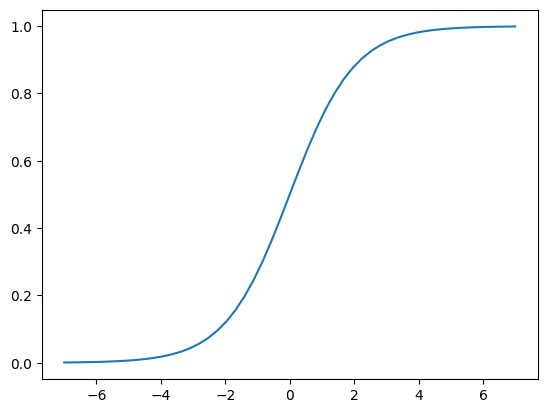

In [74]:
plt.plot(z, sigmoid(z))

In [75]:
def linear_regression(xi):
    result = w0 

    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [76]:
def logistic_regression(xi):
    score = w0 

    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
        
    return result

## 3.10 Training logistic regression with Scikit-Learn
- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
model = LogisticRegression(max_iter=5000)

In [79]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [80]:
model.intercept_[0]

np.float64(-0.045323382519725265)

In [81]:
model.coef_.round(3)

array([[ 0.685,  0.039, -0.682,  0.056, -0.015,  0.114, -0.16 ,  0.087,
         0.039,  0.002, -0.497,  0.698, -0.16 , -0.018, -0.187,  0.066,
         0.162,  0.117, -0.16 ,  0.084,  0.285, -0.16 , -0.084, -0.161,
         0.202, -0.045,  0.086, -0.052, -0.003,  0.106, -0.011,  0.066,
        -0.025,  0.194, -0.094, -0.16 ,  0.295, -0.054, -0.16 ,  0.255,
         0.235, -0.16 , -0.034, -0.069,  0.   ]])

In [82]:
y_pred = model.predict_proba(X_val)[:, 1]

In [83]:
churn_decision = (y_pred >= 0.5)

In [84]:
(y_val == churn_decision).mean()

np.float64(0.8063905325443786)

In [85]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [86]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred.correct.mean()

np.float64(0.8063905325443786)

## 3.11 Model interpretation
- Look at the coefficients
- Train a smaller model with fewer feature

In [87]:
a = [1, 2, 3, 4]
b = 'abcd'

In [88]:
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [89]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.685),
 'contract=one_year': np.float64(0.039),
 'contract=two_year': np.float64(-0.682),
 'dependents=no': np.float64(0.056),
 'dependents=yes': np.float64(-0.015),
 'deviceprotection=no': np.float64(0.114),
 'deviceprotection=no_internet_service': np.float64(-0.16),
 'deviceprotection=yes': np.float64(0.087),
 'gender=female': np.float64(0.039),
 'gender=male': np.float64(0.002),
 'internetservice=dsl': np.float64(-0.497),
 'internetservice=fiber_optic': np.float64(0.698),
 'internetservice=no': np.float64(-0.16),
 'monthlycharges': np.float64(-0.018),
 'multiplelines=no': np.float64(-0.187),
 'multiplelines=no_phone_service': np.float64(0.066),
 'multiplelines=yes': np.float64(0.162),
 'onlinebackup=no': np.float64(0.117),
 'onlinebackup=no_internet_service': np.float64(-0.16),
 'onlinebackup=yes': np.float64(0.084),
 'onlinesecurity=no': np.float64(0.285),
 'onlinesecurity=no_internet_service': np.float64(-0.16),
 'onlinesecurity=yes': np.flo

In [90]:
small = ['contract', 'tenure', 'monthlycharges']
df_train[small].iloc[:10]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
5,month-to-month,4,30.50
6,month-to-month,1,75.10
7,month-to-month,1,70.30
8,two_year,72,19.75
9,month-to-month,6,109.90


In [91]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [92]:
dict_train_small = df_train[small].to_dict(orient='records')
dict_val_small = df_train[small].to_dict(orient='records')

In [93]:
dv_small = DictVectorizer(sparse=True)
dv_small.fit(dict_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,True
,sort,True


In [94]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [95]:
X_train_small = dv_small.transform(dict_train_small)

In [96]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [97]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.4779575943972962)

In [98]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [99]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [100]:
-2.61 + (-0.008) + 30 * 0.029 + 24 * (-0.036)

-2.6119999999999997

In [101]:
sigmoid(_)

np.float64(0.06837010243703183)

## 3.12 Using the model

In [134]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [136]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [137]:
y_full_train = df_full_train.churn.values

In [138]:
model = LogisticRegression(max_iter=5000)
model.fit(X_full_train, y_full_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [139]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [140]:
X_test = dv.transform(dicts_test)

In [141]:
y_pred = model.predict_proba(X_test)[:, 1]

In [142]:
churn_decision = (y_pred >= 0.5)

In [143]:
(churn_decision == y_test).mean()

np.float64(0.8047337278106509)

In [153]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 1,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 9,
 'monthlycharges': 80.85,
 'totalcharges': 751.65}

In [154]:
X_small = dv.transform([customer])
X_small.shape

(1, 45)

In [155]:
model.predict_proba(X_small)[0, 1]

np.float64(0.7228778694505786)

In [157]:
y_test[-1]

np.int64(1)